## Step - 1 - Introduction -&gt; Give a detailed data description and objective

##### Introduction
The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset contains around 40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate

##### Objective
To Explore and mine the inference from the dataset using salary as the target variable.

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [4]:
# Loading the dataset into pandas dataframe
data = pd.read_csv("aspiring_minds_employability_outcomes_2015.csv")
# checking the dimensions of dataset
data.shape

(3998, 39)

In [5]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [6]:
# make a new dataframe because if you have same name and implement this kernel twice,it will drop the 0th column everytime
#(data = data.iloc[:,1:]) and it might be a timeconsuming to find this error.
dataset = data.iloc[:,1:]
print(f'Rows : {dataset.shape[0]}\nColumns:{dataset.shape[1]}')
dataset.info()

Rows : 3998
Columns:38
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-n

###### We can see our dataset consists of
- 27 Numerical columns
- 9 catogorical columns
- 2 datetime

###### Also we can there are no detectable NaN values in dataset.There might be in other format,we need to check

In [7]:
dataset.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,01-06-2012 00:00,present,senior quality engineer,Bangalore,f,19-02-1990 00:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,01-09-2013 00:00,present,assistant manager,Indore,m,04-10-1989 00:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,01-06-2014 00:00,present,systems engineer,Chennai,f,03-08-1992 00:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,01-07-2011 00:00,present,senior software engineer,Gurgaon,m,05-12-1989 00:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,01-03-2014 00:00,01-03-2015 00:00,get,Manesar,m,27-02-1991 00:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [8]:
np.round(dataset.describe())

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0
mean,663795.0,307700.0,78.0,2008.0,74.0,5157.0,2.0,71.0,5157.0,0.0,2012.0,502.0,502.0,513.0,1.0,353.0,95.0,91.0,23.0,16.0,32.0,3.0,-0.0,0.0,0.0,-0.0,-0.0
std,363218.0,212737.0,10.0,2.0,11.0,4802.0,0.0,8.0,4802.0,0.0,32.0,105.0,87.0,122.0,0.0,205.0,158.0,175.0,98.0,88.0,105.0,37.0,1.0,1.0,1.0,1.0,1.0
min,11244.0,35000.0,43.0,1995.0,40.0,2.0,1.0,6.0,2.0,0.0,0.0,180.0,195.0,120.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-4.0,-6.0,-5.0,-3.0,-7.0
25%,334284.0,180000.0,72.0,2007.0,66.0,494.0,2.0,66.0,494.0,0.0,2012.0,425.0,445.0,430.0,0.0,295.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0
50%,639600.0,300000.0,79.0,2008.0,74.0,3879.0,2.0,72.0,3879.0,0.0,2013.0,500.0,505.0,515.0,1.0,415.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-0.0,-0.0
75%,990480.0,370000.0,86.0,2009.0,83.0,8818.0,2.0,76.0,8818.0,1.0,2014.0,570.0,565.0,595.0,1.0,495.0,233.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0
max,1298275.0,4000000.0,98.0,2013.0,99.0,18409.0,2.0,100.0,18409.0,1.0,2017.0,875.0,795.0,900.0,1.0,840.0,612.0,715.0,623.0,676.0,548.0,516.0,2.0,2.0,3.0,3.0,2.0


### DATA CLEANING

In [9]:
### To find the anomolities in data
for i in dataset.columns:
    print('*'*20,i,'*'*20)
    print(dataset[i].unique())

******************** ID ********************
[203097 579905 810601 ... 355888 947111 324966]
******************** Salary ********************
[ 420000.  500000.  325000. 1100000.  200000.  300000.  400000.  600000.
  230000.  450000.  270000.  350000.  250000.  120000.  320000.  190000.
  180000.  335000.  435000.  345000.  145000.  220000.  530000.  340000.
  360000.  215000.   80000.  330000.  380000.  110000.  205000.   95000.
  390000.   60000.  240000.  525000.  305000.  150000.  310000.  455000.
  800000.  100000.  280000.  445000.  315000.  370000.  275000. 1500000.
  425000.  470000.  460000.  510000.  480000.  170000.  640000.  225000.
  440000. 1200000.  675000.  105000.  195000.  385000.  235000.  615000.
  290000.  140000.  405000. 1860000.  375000.  430000.  660000.   70000.
  410000.  550000.   35000.  115000.  415000.  265000.  285000.  245000.
  395000.  560000.  700000.  185000.  160000.  625000.   85000.  135000.
  785000.  210000.  155000.  355000.  535000.  690000. 

##### Observations of the columns(regarding cleaning and missing values):
1. We can see the DOJ,DOL,DOB are given in timestamp format
2. Job city column contains -1 values which are NaN equivalents.
3. 10 board column contain 0 value which is missing value
4. 12 board column contain 0 value which is missing value
5. college state column contain 'union teritory' which is not a specific state
6. Graduation year column contain 0 which is a missing value
7. Domain column contain -1 which is a missing value

##### We can see the DOJ and DOL are given in timestamp format. As per our objective,we only need date,we will convert timestamp into date using datetime module.
##### In DOL column,We can see the value 'present' . We will convert this into the present date for our analysis

In [10]:
import datetime as dt
dataset["DOJ"]=pd.to_datetime(dataset["DOJ"]).dt.date
dataset["DOL"].replace("present",dt.datetime.today(),inplace=True)
dataset['DOL'] = pd.to_datetime(dataset['DOL']).dt.date
## We will engineer this feature from DOJ and DOL as we are only concerned with how many years the person has worked
## in the organisation.
dataset['Period'] = pd.to_datetime(dataset["DOL"]).dt.year - pd.to_datetime(dataset['DOJ']).dt.year

##We only need DOB year,so we will convert DOB column from timestamp to year
dataset['DOB'] = pd.to_datetime(dataset['DOB']).dt.year
dataset.head(5)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
0,203097,420000.0,2012-01-06,2022-09-25,senior quality engineer,Bangalore,f,1990,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,10
1,579905,500000.0,2013-01-09,2022-09-25,assistant manager,Indore,m,1989,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,9
2,810601,325000.0,2014-01-06,2022-09-25,systems engineer,Chennai,f,1992,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,8
3,267447,1100000.0,2011-01-07,2022-09-25,senior software engineer,Gurgaon,m,1989,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,11
4,343523,200000.0,2014-01-03,2015-01-03,get,Manesar,m,1991,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1


###### We do not need 12th graduation and 10th graduation timestamps,we only need the age of people during graduation to know whether they have any drop years.
###### So we drop those columns and engineer new columns
- 12Gradage - It indicates the age of person during 12th graduation
- Gradage - It indicates the age of person during their higher education graduation(Degree/Engineering etc)

In [11]:
##We also know graduation year contains 0 value,we need to impute it with mode before engineering new feature from this.
## we are using dataset.GraduationYear.mode()[0] as it return a series unlike df.mean/mode
dataset['GraduationYear'].replace(0,dataset.GraduationYear.mode()[0],inplace=True)
dataset['GraduationYear']=pd.to_datetime(dataset['GraduationYear'])
dataset['gyear']=dataset['GraduationYear'].dt.year

### New columns which can used to the know 
dataset['12GradAge']=abs(dataset['12graduation']-dataset['DOB'])
dataset['GradAge']=abs(dataset['gyear']-dataset['DOB'])

In [12]:
# no of 0's per column
(dataset==0).astype(int).sum(axis=0)

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier          2797
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon       0
ComputerScience             0
MechanicalEngg              0
ElectricalEngg              0
TelecomEngg                 0
CivilEngg                   0
conscienti

In [13]:
dataset.isin([-1, 'NaN']).sum()

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscienti

#### Column : 'Designation'
###### Designation Column has 'get' value which is a not a desired value.We should clean this and can be imputed with mode of the column.

In [14]:
### Here we could have compared modes of all the columns and then could have selected the mode out of the resulting modes
### But from intuition,i thought mostly people from particular specialization choose desired designations.
dataset[dataset["Designation"]=="get"][['Designation','JobCity','Salary','Specialization']]

,Designation,JobCity,Salary,Specialization
4,get,Manesar,200000.0,electronics and communication engineering
332,get,-1,180000.0,mechanical and automation
350,get,Faridabad,340000.0,electrical engineering
1717,get,Hyderabad,145000.0,mechanical engineering
1897,get,Hyderabad,175000.0,mechanical engineering
2140,get,Indore,600000.0,mechanical engineering
2318,get,Lucknow,220000.0,electronics and electrical engineering
2443,get,kharagpur,110000.0,mechanical engineering
2666,get,Hyderabad,200000.0,electronics and electrical engineering
2757,get,Nashik,350000.0,mechanical engineering


###### From here,we can see that most of people whose designation is unknown are from mechanical domain(70%) and ECE(30%).
###### So we can pick the mode of designation for people belonging to mechanical domain and impute it with get value.
###### similarly for electrical domain

In [15]:
#for people with mechanical engineering,it gives the mode value which will be replaced with the 'get'.
mech = dataset[dataset['Specialization'].isin(['mechanical engineering','mechanical and automation'])]['Designation'].mode()[0]
#for people with electronics and electrical engineering,it gives the mode value which will be replaced with the 'get'.
eee = dataset[dataset['Specialization']==('electronics and electrical engineering')]['Designation'].mode()[0]
print(f'mode for mechanical:  {mech}\nmode for EEE:  {eee}')

mode for mechanical:  production engineer
mode for EEE:  system engineer


###### Now we will impute the 'get' of designation with modes of the respective domains

In [16]:
#For mechanical domain
dataset.loc[dataset['Specialization'].isin(['mechanical engineering','mechanical and automation']),'Designation'].replace('get',mech,inplace=True)
#for EEE domain,as all previous get's will be replaced,we can replace the remaining directly without conditions
dataset['Designation'].replace('get',eee,inplace=True)

#### Column : 'Jobcity'
###### Jobcity contains missing values(-1).We will treat this by using mode.We will compute the mode of all columns with rows having jobcity as -1.Then we make a list of these modes and compute the overall mode of the resulting list.
###### In this way,we could consider all columns for substituting the missing value.

In [17]:
### we do not want our data to be case sensitive in jobcity
### ,because it will effect our analysis.so let us replace -1 with some string and then apply title method to it.
dataset['JobCity'].replace(-1,'unknown',inplace=True)
dataset['JobCity'].apply(lambda x:x.title())

0              Bangalore
1                 Indore
2                Chennai
3                Gurgaon
4                Manesar
              ...       
3993          New Delhi 
3994           Hyderabad
3995           Bangalore
3996    Asifabadbanglore
3997             Chennai
Name: JobCity, Length: 3998, dtype: object

#### DATA VISUALIZATION

<Figure size 1080x360 with 0 Axes>

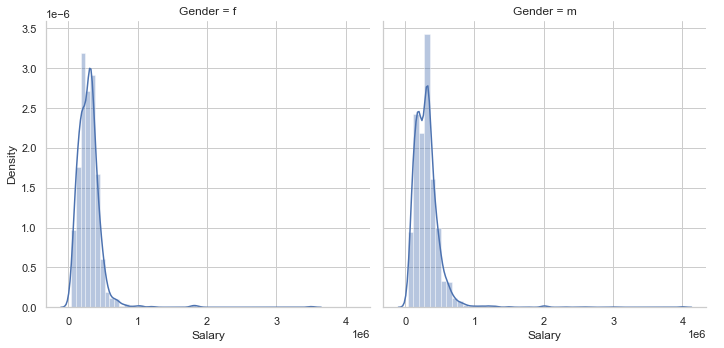

<function print>

In [18]:
plt.figure(figsize=(15,5))
colors = sns.color_palette('bright',n_colors=2)
sns.FacetGrid(dataset, col="Gender", size=5,palette=colors) \
   .map(sns.distplot, "Salary",bins=50) \
   .add_legend()
plt.show()
print

- We can observe that the salary data is right skewed.
- We can also see that the distributions are quite similar for male and female in the range below 10lakhs.

m    3041
f     957
Name: Gender, dtype: int64


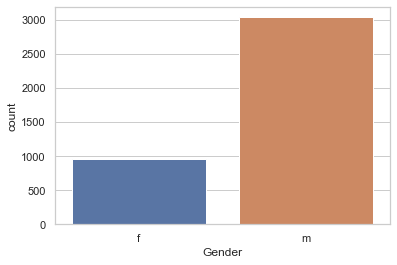

In [19]:
sns.countplot(dataset['Gender'])
print(dataset['Gender'].value_counts())

- The ratio of m/f is 3.19 indicates there are 3 times more men than women employed

<AxesSubplot:xlabel='Salary', ylabel='Gender'>

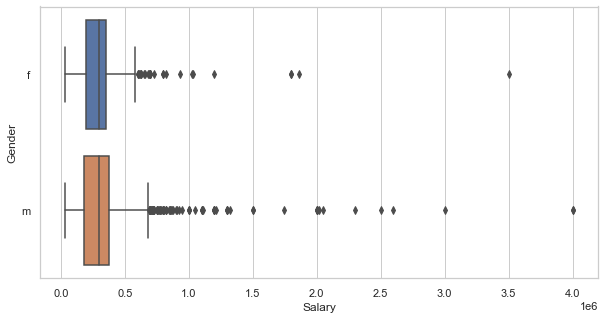

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Salary',y='Gender',data=dataset)

- It is noted that there are many outliers in the salary data
- There is not much difference between median salary for both genders.
- We can also observe male have more outliers indicating they are more people getting higher pays in male than female category

Text(0.5, 0.98, 'Salary levels by specialization')

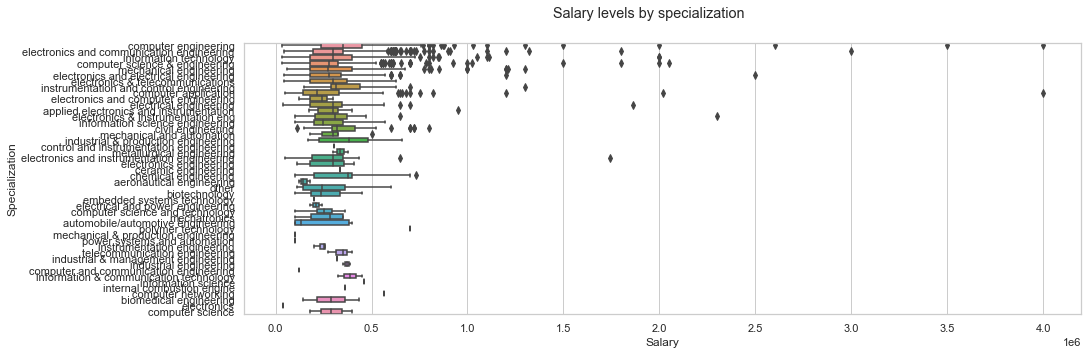

In [21]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Salary',y='Specialization',data=dataset)
plt.suptitle('Salary levels by specialization')

- Median salary of people from all specializations are nearly similar.
- We can see there are more people getting higher pays who have specialization in CS/EC compared to others.

In [22]:
### Designation
popular_Designation = dataset['Designation'].value_counts()[:20].index.tolist()
print(popular_Designation)

['software engineer', 'software developer', 'system engineer', 'programmer analyst', 'systems engineer', 'java software engineer', 'software test engineer', 'project engineer', 'technical support engineer', 'senior software engineer', 'java developer', 'test engineer', 'web developer', 'application developer', 'assistant manager', 'network engineer', 'data analyst', 'business analyst', 'engineer', 'associate software engineer']


In [23]:
### We want on
top_Designations = dataset[dataset['Designation'].isin(popular_Designation)]
print(f"Unique professions : {len(dataset['Designation'].unique())}")
top_Designations.head()

Unique professions : 418


,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period,gyear,12GradAge,GradAge
1,579905,500000.0,2013-01-09,2022-09-25,assistant manager,Indore,m,1989,85.40,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,1970-01-01 00:00:00.000002012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,9,1970,18,19
2,810601,325000.0,2014-01-06,2022-09-25,systems engineer,Chennai,f,1992,85.00,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,1970-01-01 00:00:00.000002014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,8,1970,18,22
3,267447,1100000.0,2011-01-07,2022-09-25,senior software engineer,Gurgaon,m,1989,85.60,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,1970-01-01 00:00:00.000002011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,11,1970,18,19
4,343523,200000.0,2014-01-03,2015-01-03,system engineer,Manesar,m,1991,78.00,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,1970-01-01 00:00:00.000002012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,1970,17,21
5,1027655,300000.0,2014-01-06,2022-09-25,system engineer,Hyderabad,m,1992,89.92,state board,2010,87.0,state board,5086,2,B.Tech/B.E.,electronics and communication engineering,76.32,5086,0,Karnataka,1970-01-01 00:00:00.000002014,560,555,620,-1.000000,645,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,8,1970,18,22


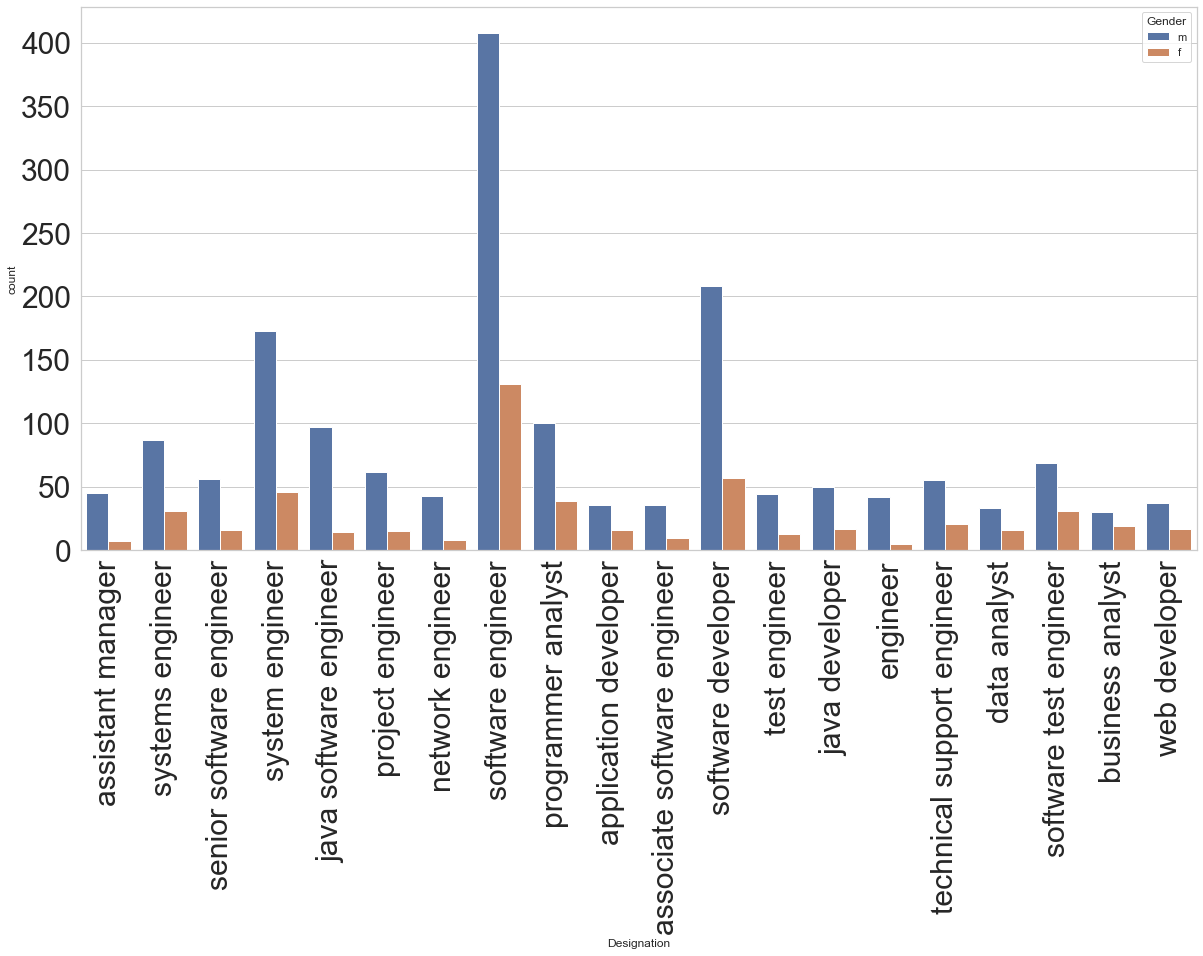

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x='Designation',hue='Gender',data=top_Designations)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=30)
plt.show()

- All the general professions are more dominated by the males as we can there is considerable difference of frequency for every role.
- Here we took the most common roles taken by the amcat aspirants which are mostly 'IT Roles'.
- from the below plot,we can understand the reason for most 'IT roles' might be because of Specialization.

<AxesSubplot:xlabel='Specialization', ylabel='count'>

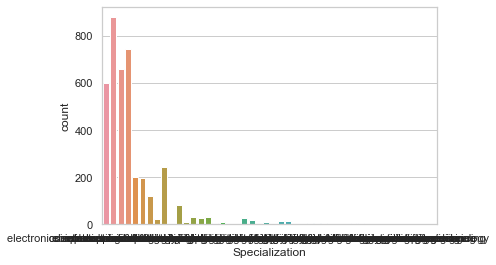

In [25]:
sns.countplot(dataset['Specialization'])

<AxesSubplot:xlabel='Degree', ylabel='count'>

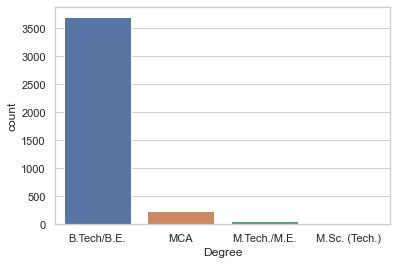

In [26]:
sns.countplot(dataset['Degree'])

- Most of the Amcat aspirants are from Btech domain

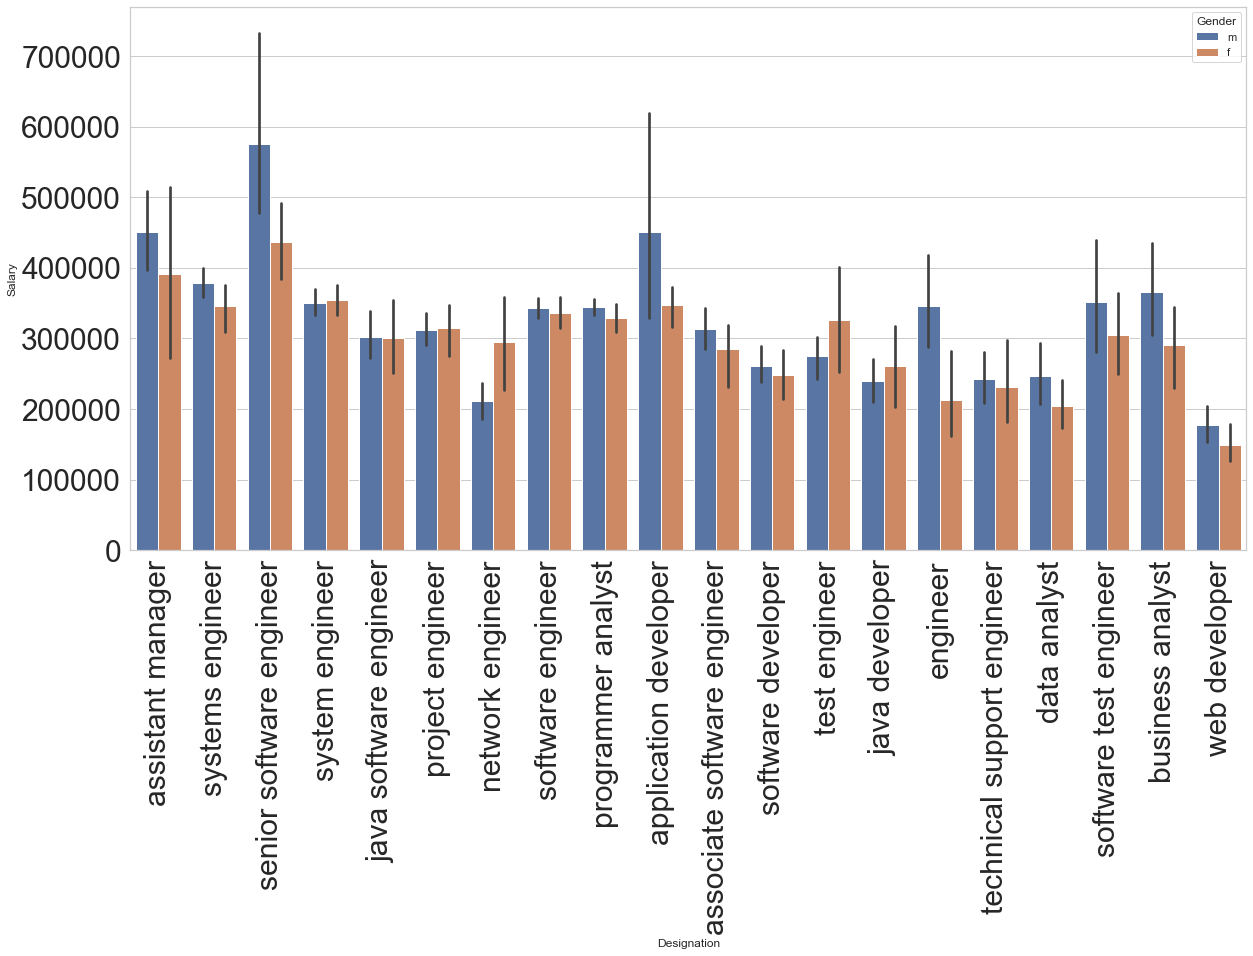

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x='Designation',y='Salary',hue='Gender',data=top_Designations)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=30)
plt.show()

- mean salary of top most frequent roles is nearly independent of gender.
- there is some considerable difference in some roles.but we cannot be sure that women is being paid less in that role
- it might be due to experience,specialization etc.

In [28]:
### Now lets us see the high paying designations and their relation with respect to gender
high = list(dataset.sort_values("Salary",ascending=False)["Designation"].unique())[:20]
high_pay = dataset[dataset['Designation'].isin(high)]
high_pay.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period,gyear,12GradAge,GradAge
3,267447,1100000.0,2011-01-07,2022-09-25,senior software engineer,Gurgaon,m,1989,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,1970-01-01 00:00:00.000002011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194,11,1970,18,19
6,947847,300000.0,2014-01-08,2015-01-05,java software engineer,Banglore,m,1993,86.08,state board,2010,67.50,state board,314,2,B.Tech/B.E.,computer science & engineering,72.98,314,1,Karnataka,1970-01-01 00:00:00.000002014,590,435,380,0.356536,405,-1,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872,1,1970,17,23
14,1279958,300000.0,2013-01-07,2022-09-25,java software engineer,Bangalore,m,1992,81.20,state board,2008,79.90,state board,64,2,B.Tech/B.E.,instrumentation and control engineering,67.67,64,0,Uttar Pradesh,1970-01-01 00:00:00.000002013,395,565,645,-1.000000,495,-1,376,-1,-1,-1,-1,0.7027,0.7119,0.0100,-0.9950,0.6721,9,1970,16,22
19,466888,325000.0,2014-01-09,2022-09-25,software engineer,Pune,f,1990,79.00,cbse,2008,62.20,cbse,7977,2,B.Tech/B.E.,computer engineering,76.30,7977,0,Uttar Pradesh,1970-01-01 00:00:00.000002012,485,445,435,0.864685,525,-1,-1,-1,-1,-1,-1,0.8192,0.2668,-0.2714,-0.4078,-0.1295,8,1970,18,20
20,140069,320000.0,2010-01-11,2012-01-09,software engineer,Bangalore,f,1988,91.20,karnataka secondary school of examination,2006,84.63,karnataka pre university board,4437,2,B.Tech/B.E.,computer engineering,78.15,4437,0,Karnataka,1970-01-01 00:00:00.000002010,455,535,445,0.635979,445,-1,-1,-1,-1,-1,-1,-0.1082,0.9688,0.5269,-0.2902,0.3444,2,1970,18,18


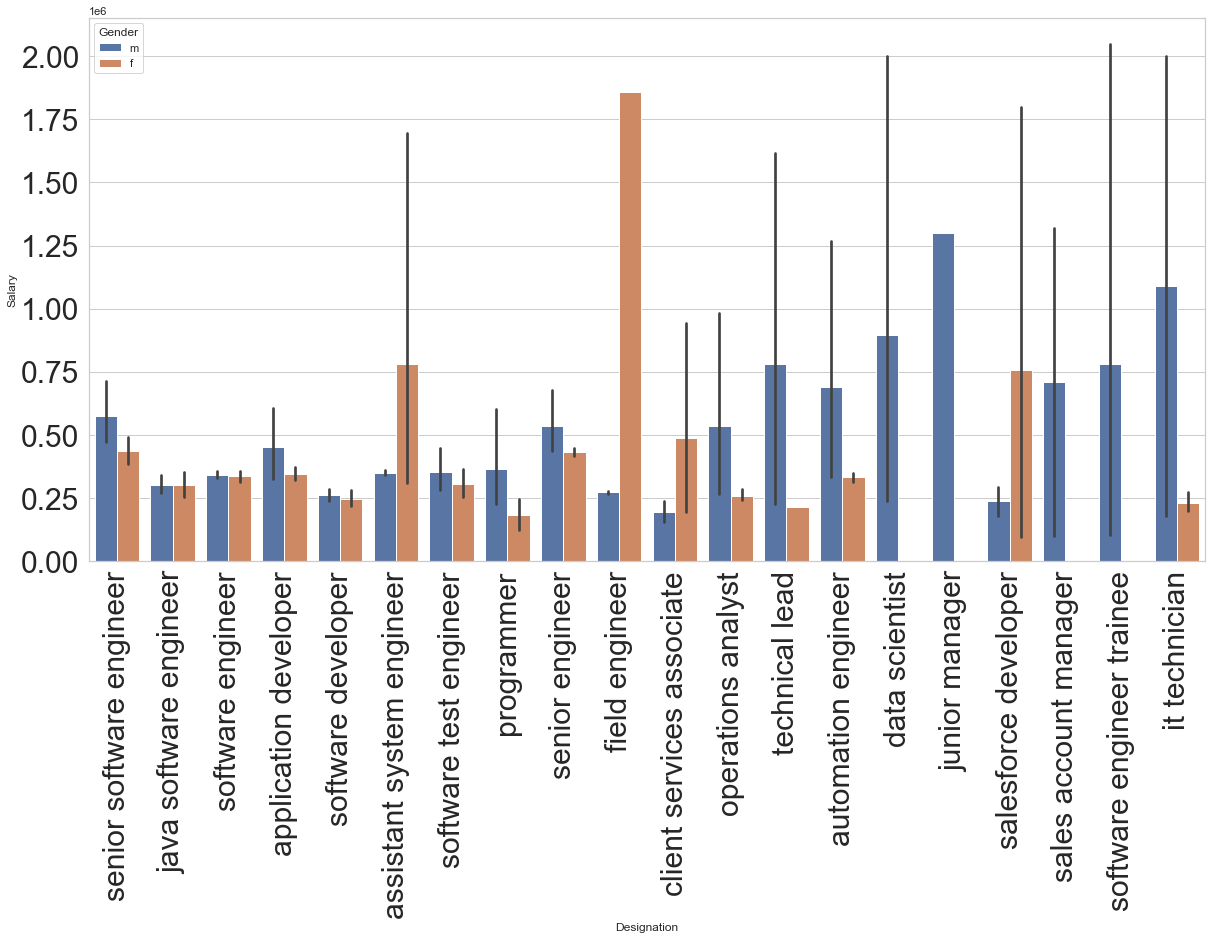

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x='Designation',y='Salary',hue='Gender',data=high_pay)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=30)
plt.show()

- Most of the high paying jobs are from IT domain.
- In 45% of top paying roles,men are generally paid higher compared to women.
- In 20% of top paying roles,women are paid higher than men
- In roles like junior manager,sales account manager,software engineer trainee there are no women working in these fields.
- Junior manager is highest paying for men and field engineer is the highest paying role for women.
- The disperancy between pay based on gender might be because of other features like experience,specialization etc.
- Software Enginner and Software developer are most frequent and highest paying jobs

<AxesSubplot:>

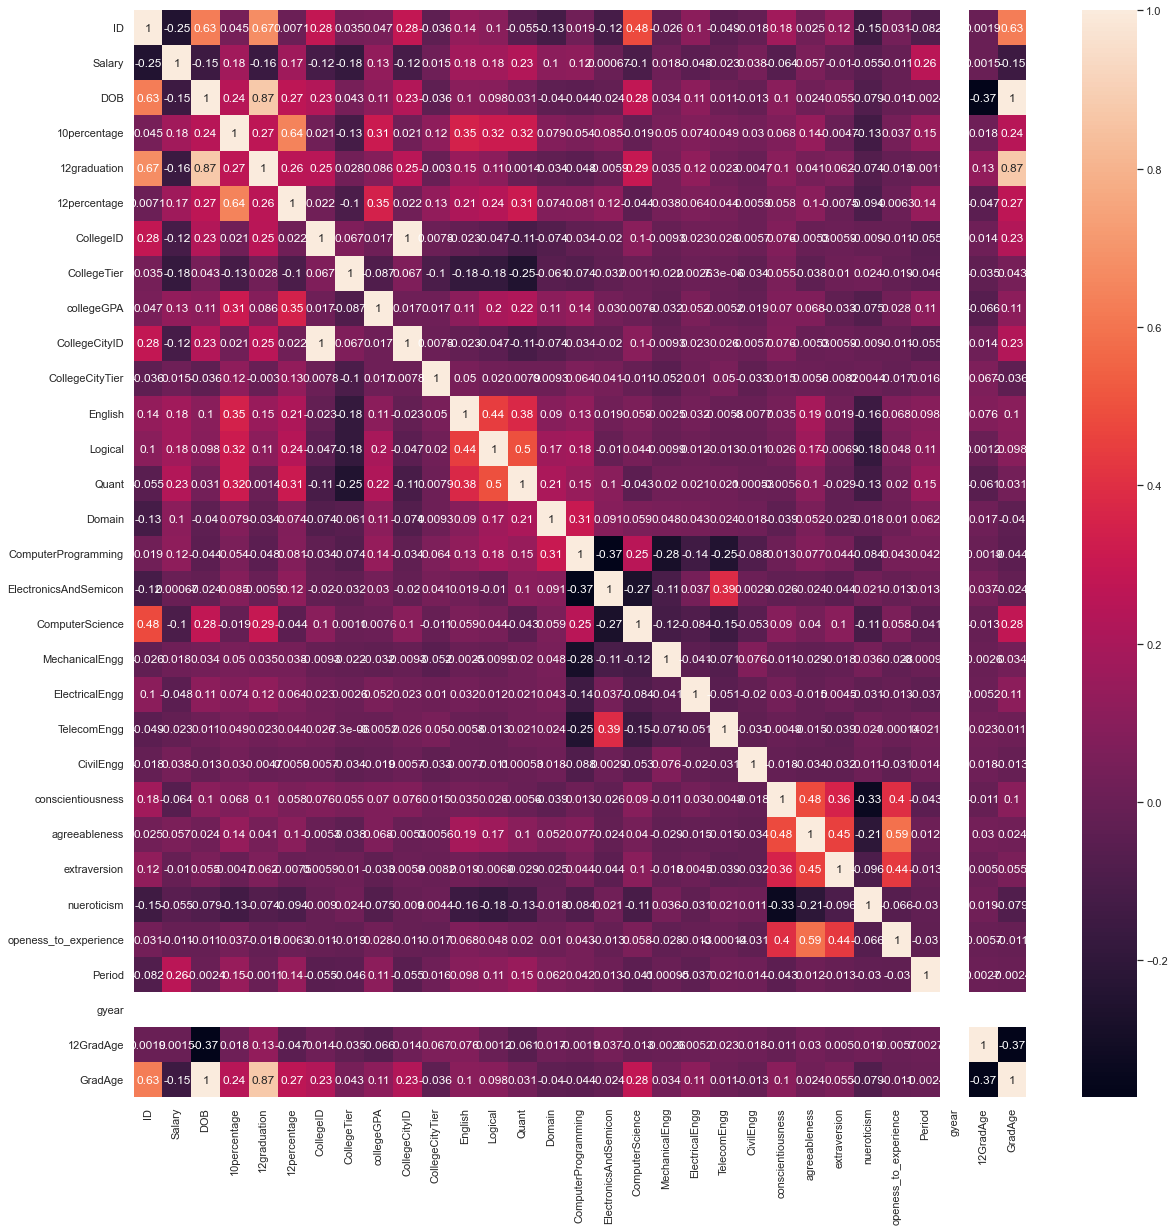

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),annot=True)

For Whole dataset
Gender
f    5.539474
m    5.206721
Name: Period, dtype: float64
********************
For High_paying jobs
Gender
f    4.873563
m    4.799408
Name: Period, dtype: float64


<Figure size 1440x360 with 0 Axes>

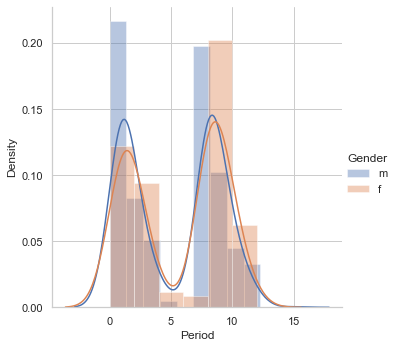

In [31]:
### Lets us check experience distribution of both male and female
plt.figure(figsize=(20,5))

sns.FacetGrid(high_pay, hue="Gender",size=5) \
   .map(sns.distplot, "Period") \
   .add_legend()
print('For Whole dataset')
print(high_pay.groupby('Gender').Period.mean())
print('*'*20)
print('For High_paying jobs')
print(dataset.groupby('Gender').Period.mean())

- It is a Bi-Modal Districution
- Average Experience of male is around 5years and for women it is around 4 and half years.

<AxesSubplot:xlabel='Period', ylabel='Salary'>

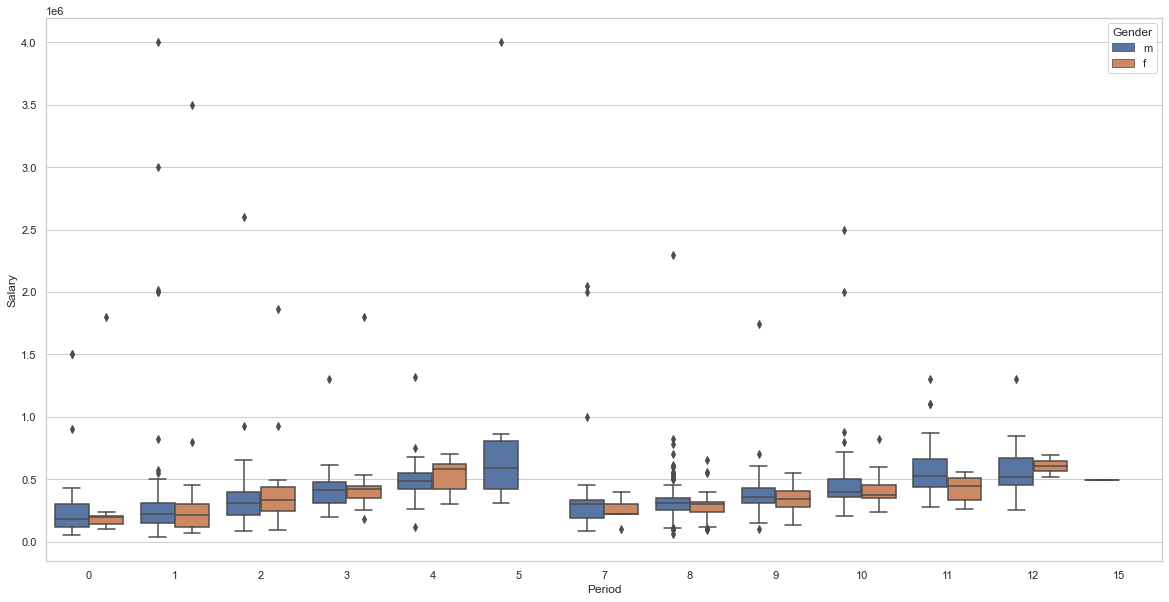

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(data=high_pay,x='Period',y='Salary',hue='Gender')

- Median salary of both males and females have increased slightly with exp for first five years
- and Decreased suddenly on the 6th year and then same pattern for the following years.
- We can see that men and women having same experience are paid nearly equally around 3.5-5 lakhs
- we need to further see the distribution of experience with respect to Designation for both men and women
- to check whether women are being paid less in a role due to experience.

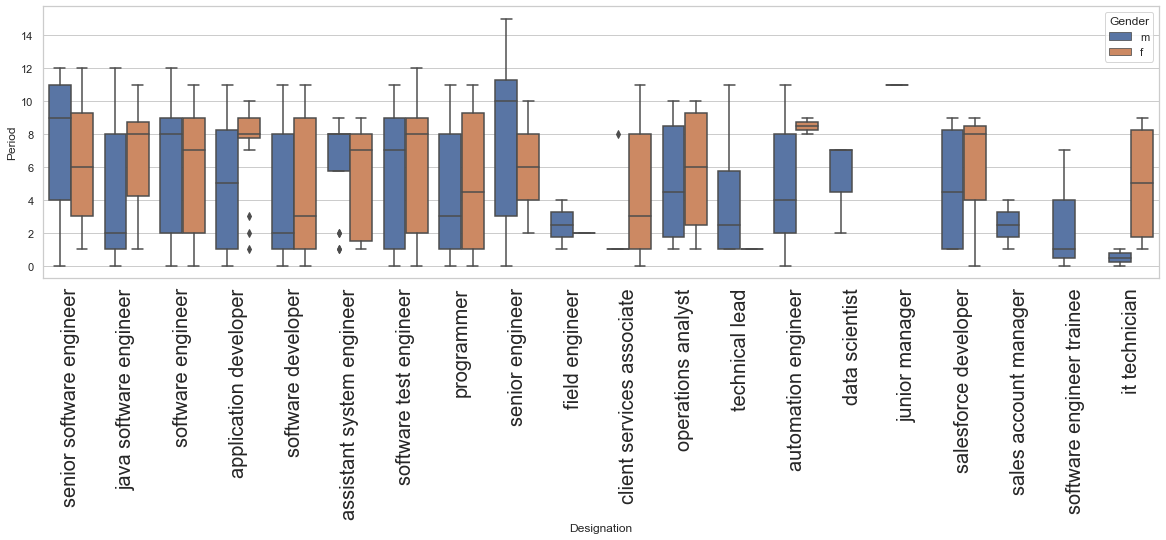

In [33]:
plt.figure(figsize=(20,5))
sns.boxplot(data=high_pay,x='Designation',y='Period',hue='Gender')
plt.xticks(fontsize=20,rotation=90)
plt.show()

- The period distribution for maximum number of Designations is skewed and this tells us every designation have people with both high and low experience
- We can see there is difference in median experience of male and female in every designation.
- But it is not a strong evidence to conclude salary difference for women is due to experience because of the fact that in some roles even women having higher experience are paid less and viceversa for men.
- Also Experience has not strong correlation with salary
- Maxium experience Designation is Senior Engineer

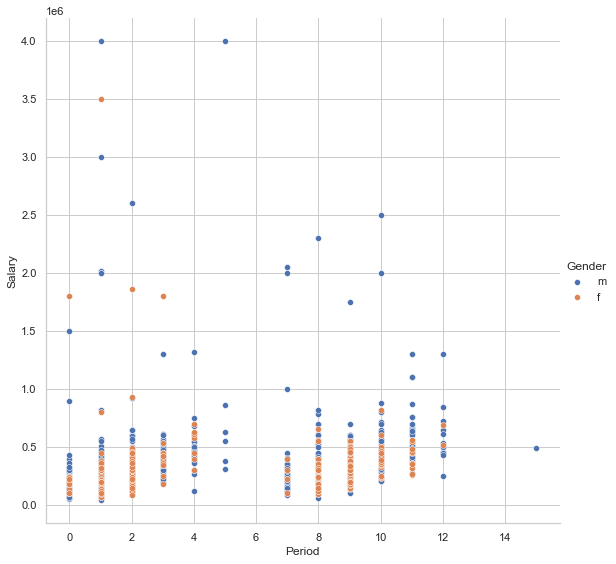

In [34]:
sns.FacetGrid(data=high_pay,hue='Gender', size=8) \
    .map(sns.scatterplot,'Period','Salary') \
    .add_legend()

- For same amount of experience,men are paid slightly higher than women in most of the cases.
- Mostly men have highly paid jobs compared with women for every level of experience.

In [35]:
### What is average experience of software engineer and software developer?
dataset[dataset.Designation.isin(['software engineer','software developer']) & dataset.Gender=='m']['Period'].mean()

nan

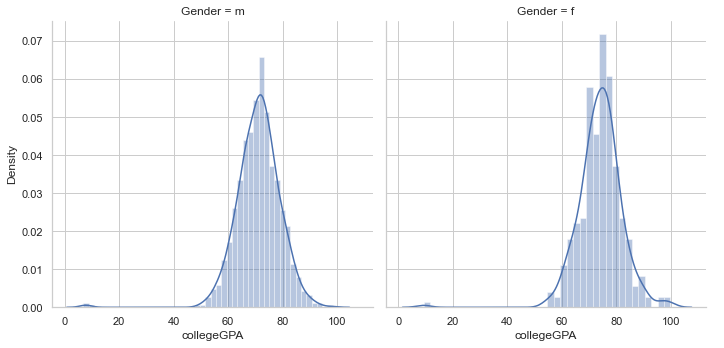

In [36]:
### Now let us check relation with collegegpa
### first check the distribution of gpa 
sns.FacetGrid(data=high_pay,col='Gender',size=5) \
    .map(sns.distplot,'collegeGPA') \
    .add_legend()

- We can see both distribution of college gpa vs male&female are normally distributed with mean around 75%.
- We can see how Similar both male and female distributions are for collegeGPA
- IQR is narrow indication most number of students have similar cgpa in 70-75% region.
- There are some students with CGPA < 20 and CGPA>90

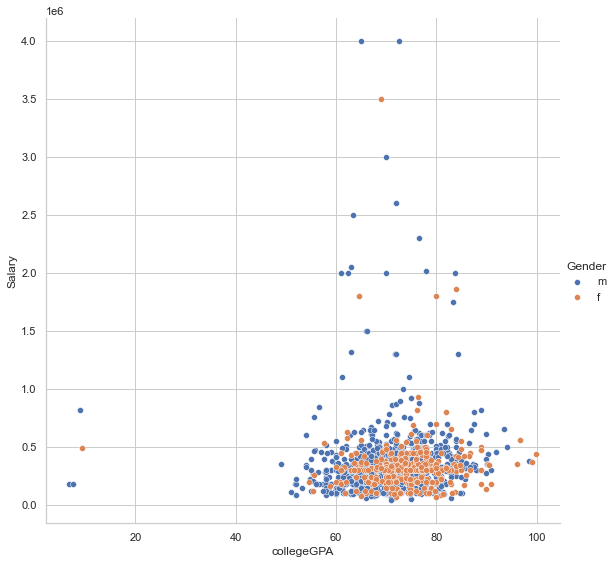

In [37]:
sns.FacetGrid(data=high_pay,hue='Gender',size=8) \
    .map(sns.scatterplot,'collegeGPA','Salary') \
    .add_legend()

- Most of men and women have cgpa around 70-75 which is a good range.
- There is no relation that having high or low gpa being men/women is effecting the salary
- so we can conclude this is not the reason for women being paid less as both distributions overlap extensively.

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

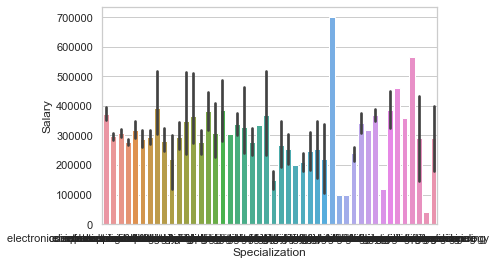

In [38]:
sns.barplot(data=dataset,x='Specialization',y='Salary')

- Aspirants from CE Branch earns the highest average pay
- All the other branches earn nearly similar average pay

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

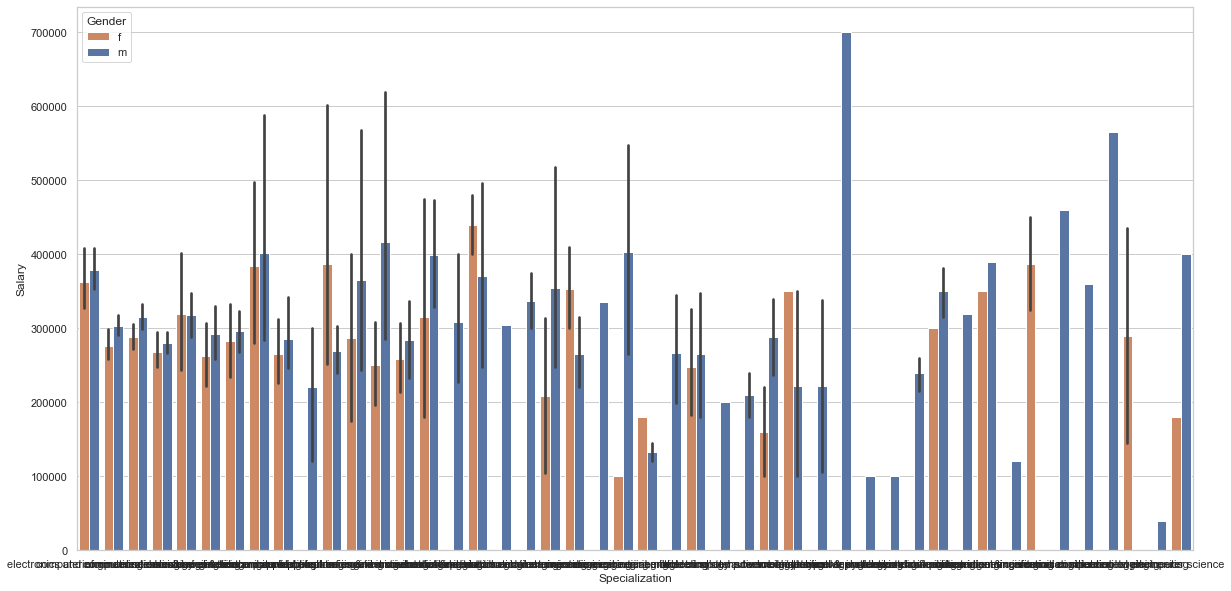

In [39]:
# For the total Dataset
## Checking whether specialization has any effect on salary
plt.figure(figsize=(20,10))
palette = [(0.8666666666666667, 0.5176470588235295, 0.3215686274509804),(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]
sns.barplot(data=dataset,x='Specialization',y='Salary',hue='Gender',palette=palette)

- Men from CS,EC,CE Earn slightly greater than women from this specialization.
- Women from the EL specialization Earns way more than men from same specialization.

<AxesSubplot:xlabel='Specialization', ylabel='Salary'>

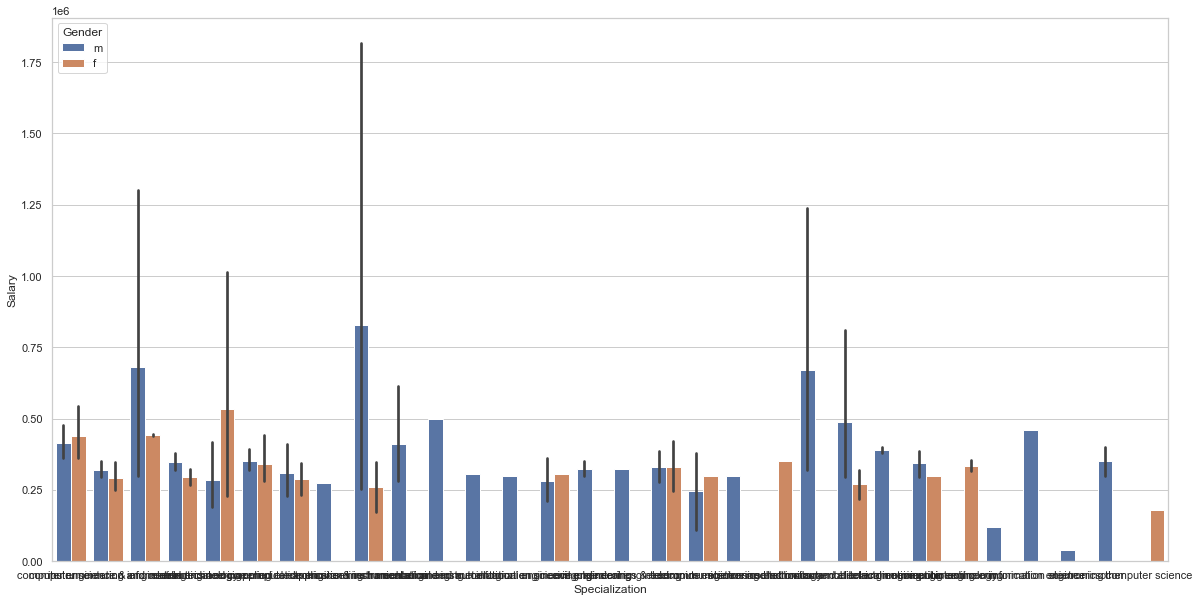

In [40]:
# for the dataset containing Highpaying Jobs
plt.figure(figsize=(20,10))
sns.barplot(data=high_pay,x='Specialization',y='Salary',hue='Gender')

- This is for the people who have higher pays
- From the CE Specialization,Only men are taking up higher pay jobs
- Mostly specialization is not the reason for women being paid less becuase as we say bulk of people are from cs and for cs men and women earn similar

<AxesSubplot:xlabel='CollegeTier', ylabel='Salary'>

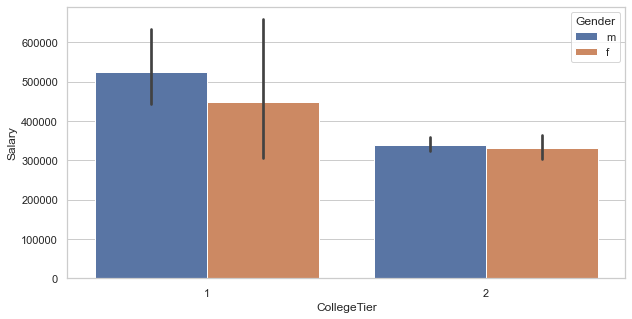

In [41]:
### Lets us check salary with the College Tier
plt.figure(figsize=(10,5))
sns.barplot(data=high_pay,x='CollegeTier',y='Salary',hue='Gender')

In [42]:
high_pay.groupby('CollegeTier').Gender.value_counts()

CollegeTier  Gender
1            m          85
             f          17
2            m         897
             f         287
Name: Gender, dtype: int64

- From the above bar graph,we can see that students from tier1 colleges have higher salary.
- We can see more men are from tier1 colleges than women and overally most students are from tier2 colleges.
- This might be a reason for women being paid less than men in high paying jobs because as most of women are from tier-2 colleges

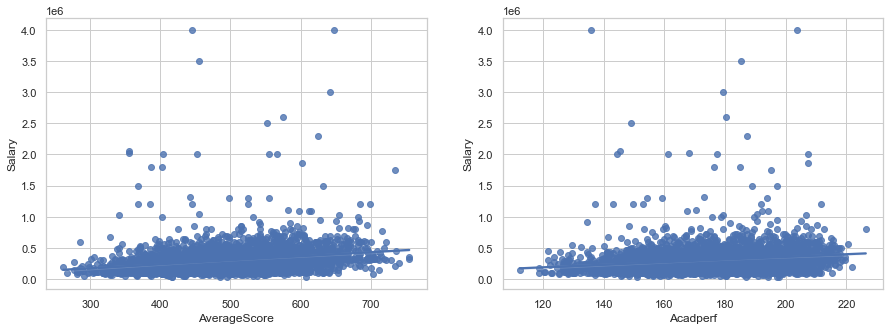

In [43]:
plt.figure(figsize=(15,5))
dataset['AverageScore']=(dataset['Logical']+dataset['Quant']+dataset['English'])/3
dataset['Acadperf']=dataset['10percentage']+dataset['12percentage']+dataset['collegeGPA']/3
plt.subplot(1,2,1)
sns.regplot(x='AverageScore',y='Salary',data=dataset)
plt.subplot(1,2,2)
sns.regplot(x='Acadperf',y='Salary',data=dataset)
plt.show()

- We can see there is some positive correlation of salary with both the Avgscore and Acadperformance.

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

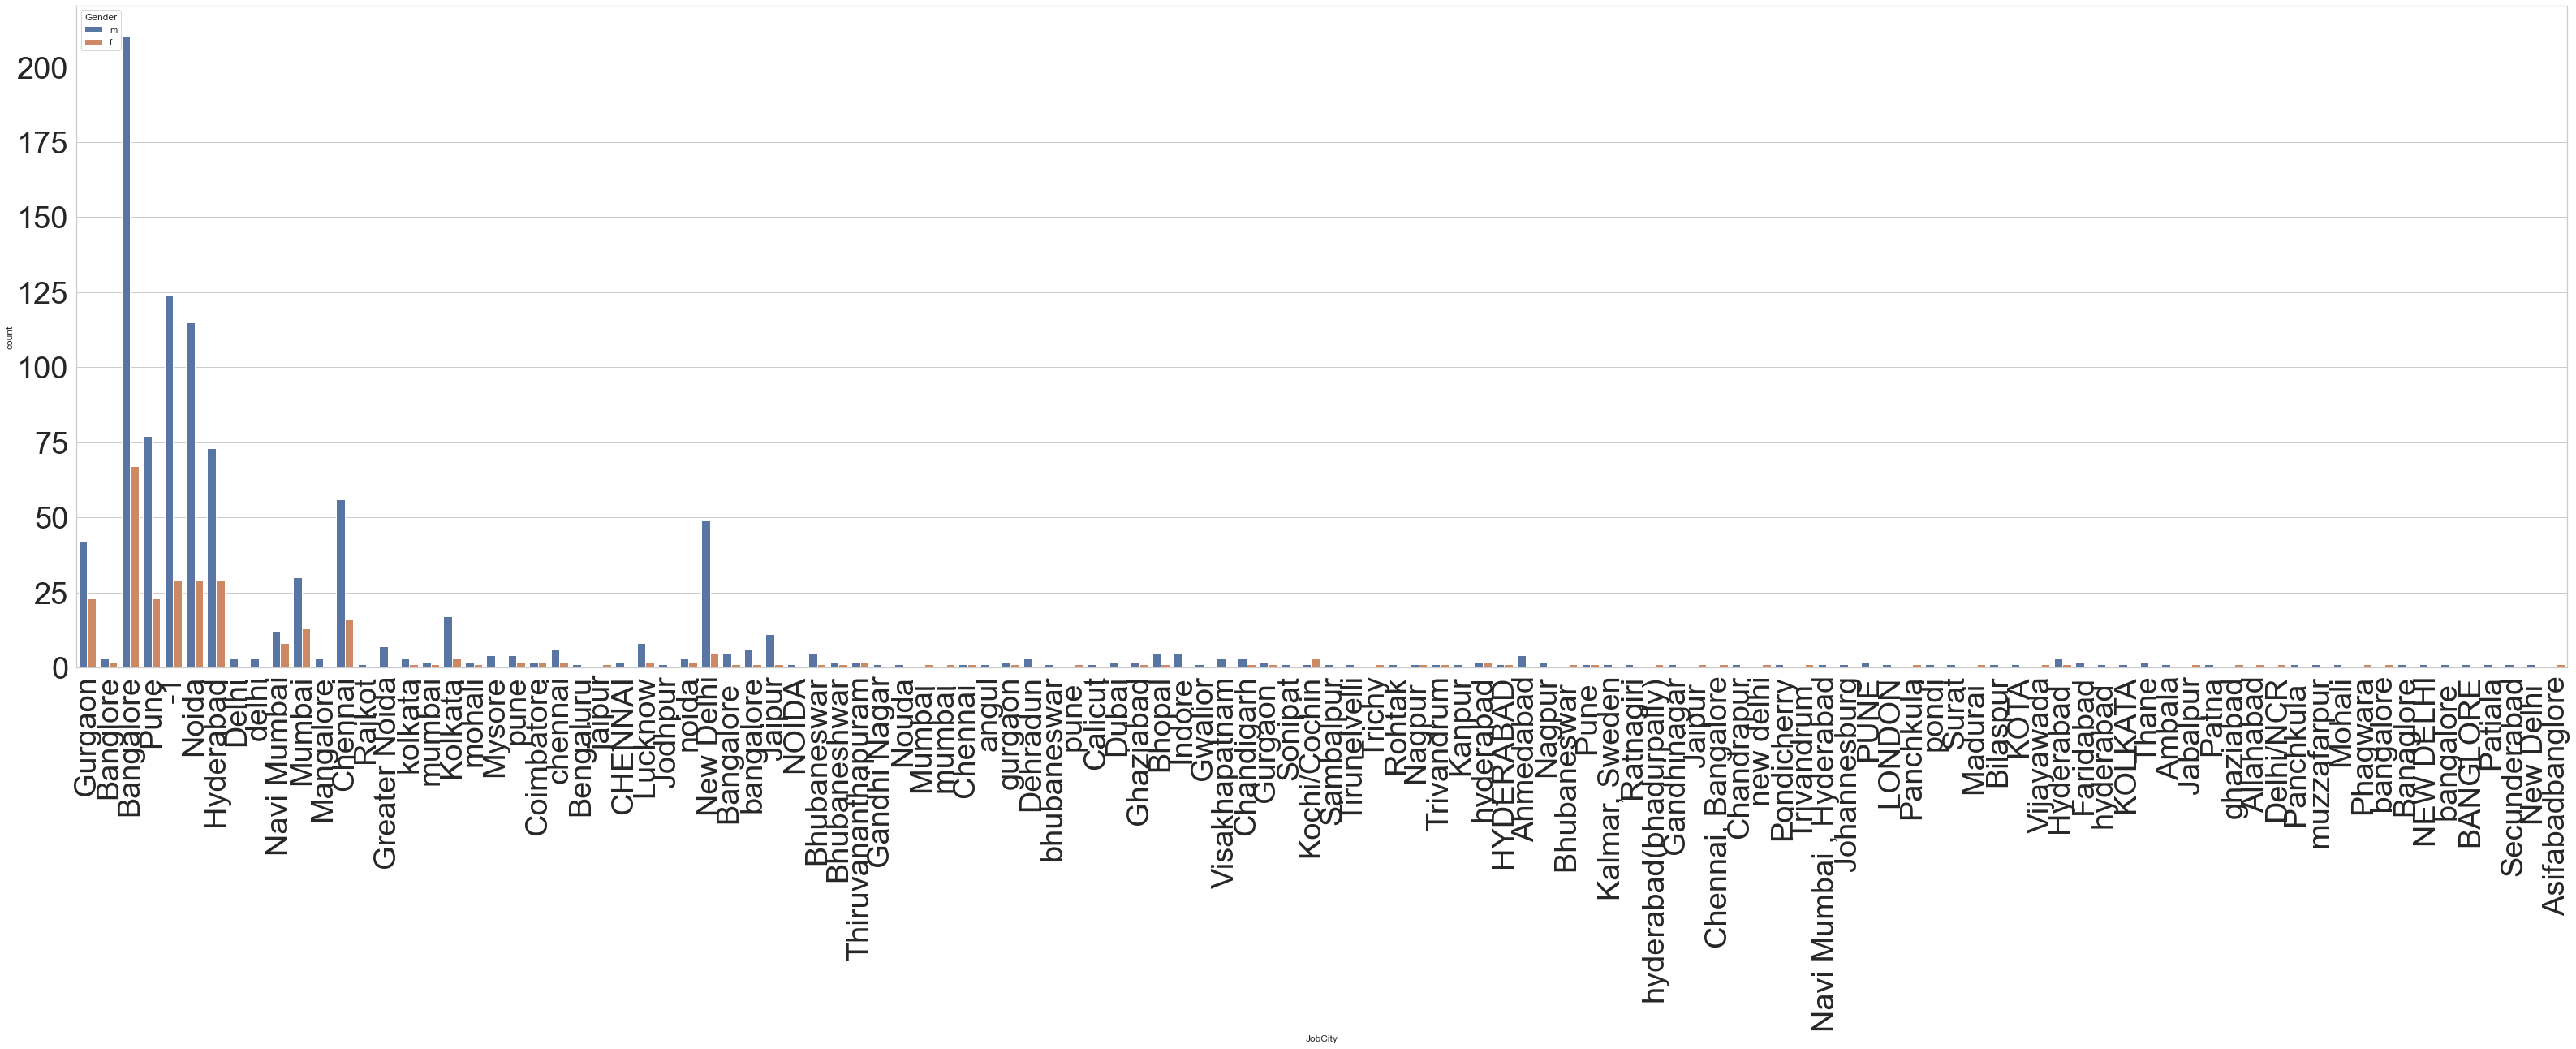

In [44]:
plt.figure(figsize=(55,15))
sns.countplot(x="JobCity",data=high_pay,hue="Gender")
plt.xticks(fontsize=38,rotation=90)
plt.yticks(fontsize=38)

- Most amcat aspirants work in bengaluru,Noida,hyderabad and pune.
- It is because most of them are from IT domain so majority of them work in these cities

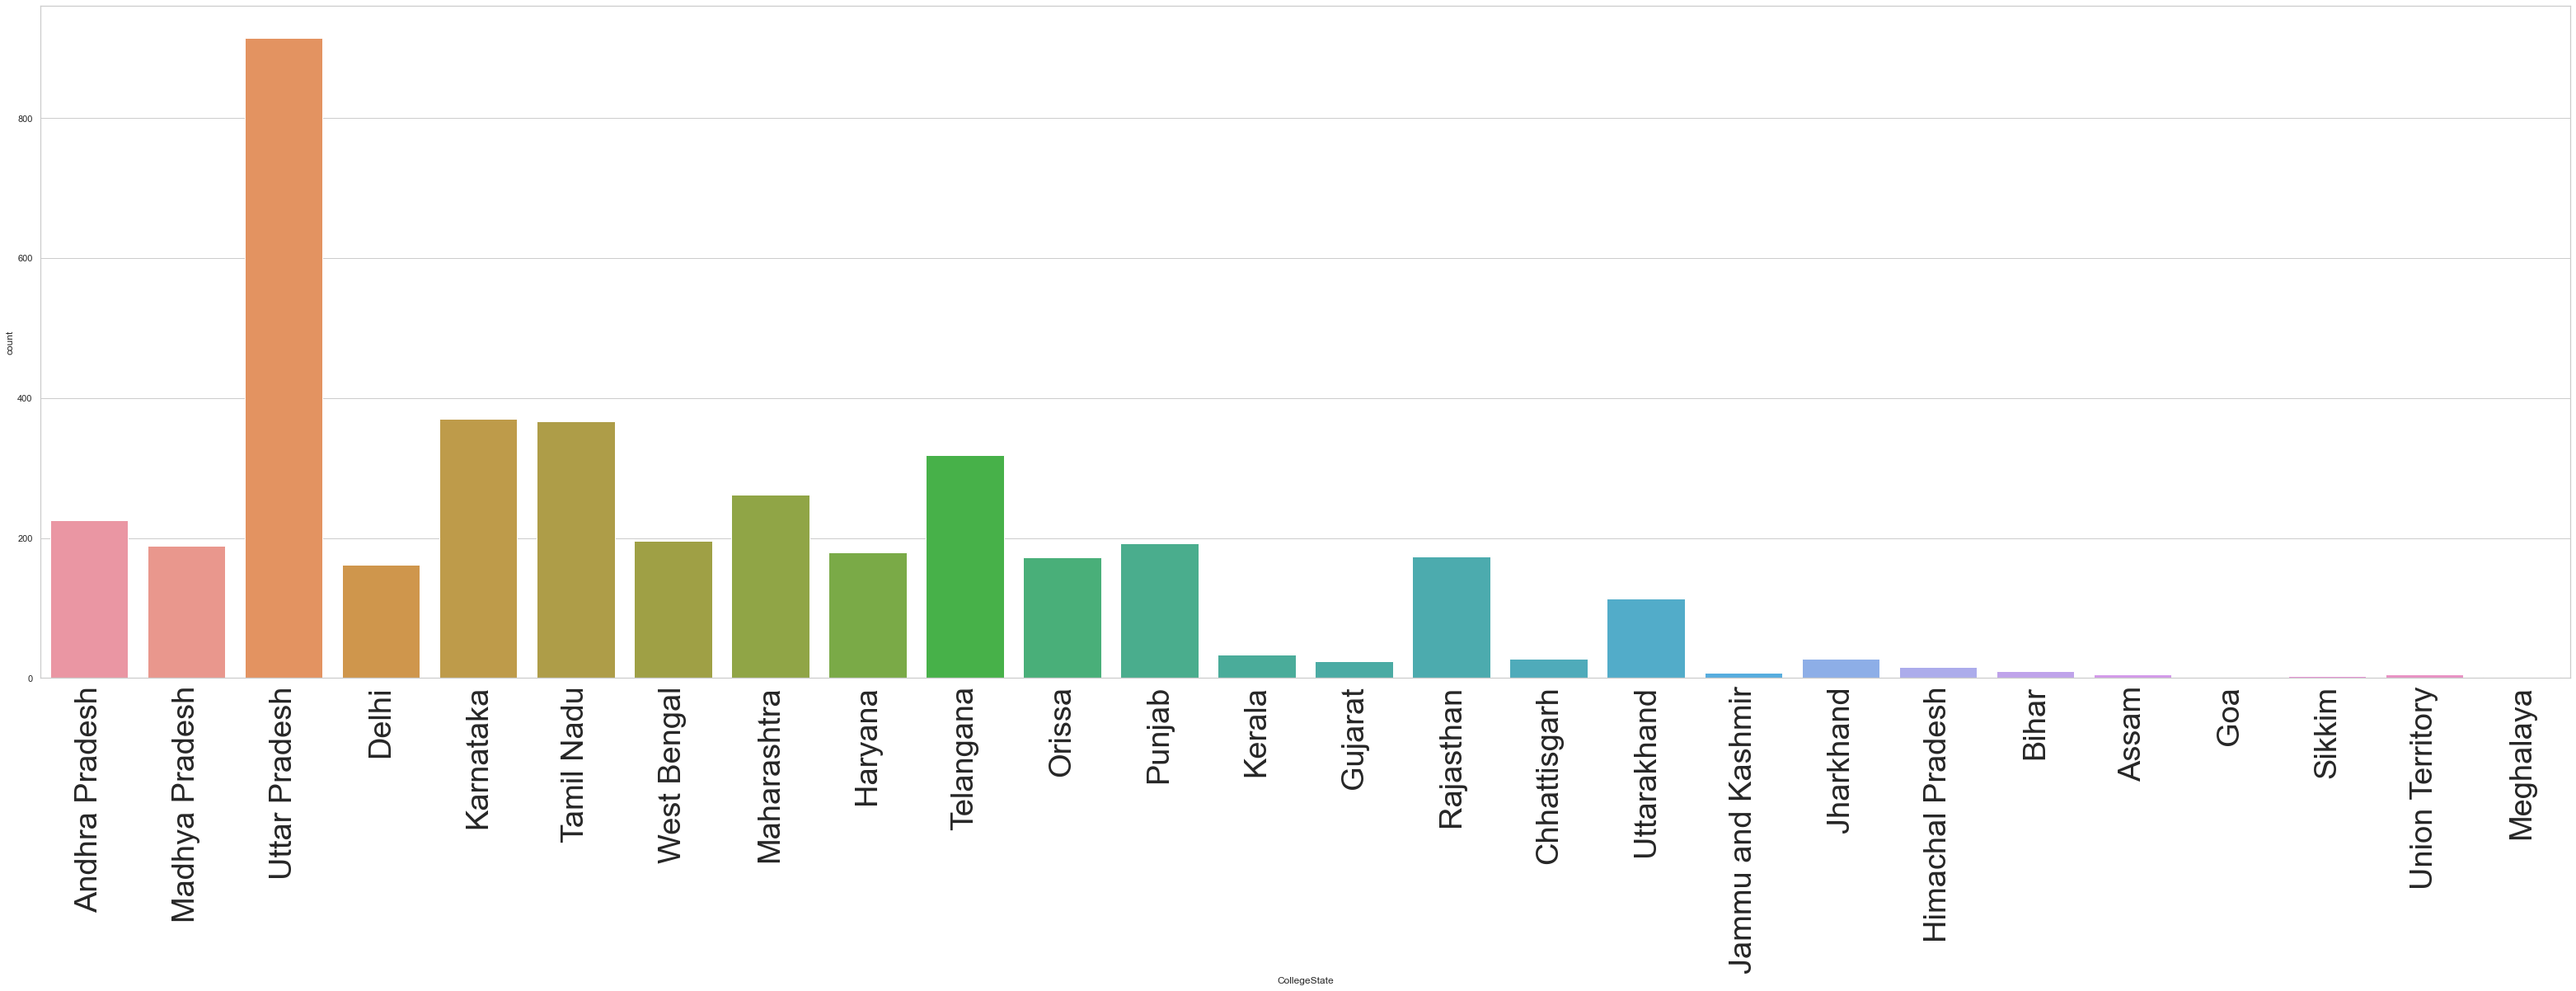

In [45]:
plt.figure(figsize=(55,15))
sns.countplot(data=dataset,x='CollegeState')
plt.xticks(fontsize=38,rotation=90)
plt.show()

## Overall Conclusions:
1. Most of Amcat Aspirants are male working in IT domain with an experience of around 5years with degree in Btech and specialization in Computer Science/Information Technology from tier-2 college in uttarpradesh with an average salary around 300k.
2. Highpaying jobs taken up by amcat aspirants are mostly from 'IT' Domain.
3. Software Engineer and Software Developer are the most aimed profession for amcat aspirants.